In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
#from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared

In [ ]:
from google.colab import files
data_to_load = files.upload()
gold_data = pd.read_csv('gld_price_data.csv')
gold_data

Saving gld_price_data.csv to gld_price_data.csv


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
#print the first 5 rows of dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#numbers of rows and colume
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting the statistical measure of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation = gold_data.corr()

<ipython-input-9-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

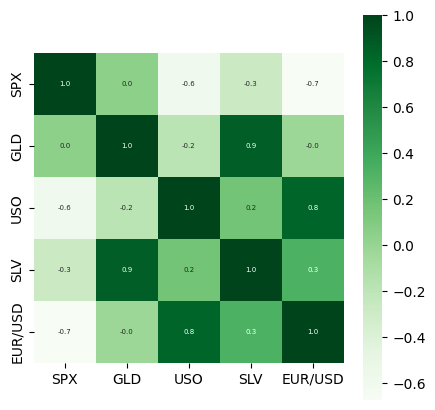

In [ ]:
# constructing the heatmap to understand the correlation
plt.figure(figsize = (5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':5}, cmap='Greens')

In [ ]:
#correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


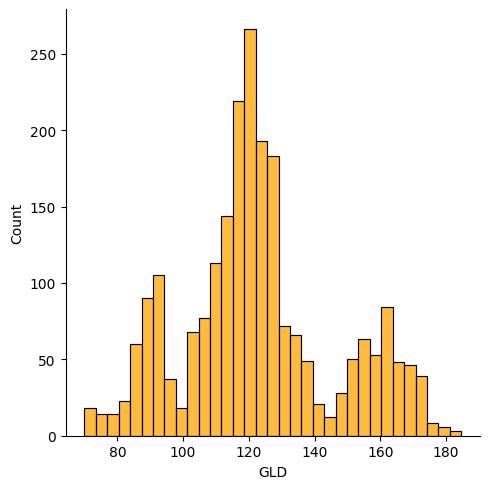

In [ ]:
#checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='orange')

In [ ]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
#Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.53459915  82.19089988 116.15889988 127.51540048 120.75280131
 154.77639691 150.43739845 126.08790043 117.51479888 125.84970077
 116.55860094 172.17270067 141.2897976  167.95939875 115.23070024
 117.39500075 138.1199031  169.73670049 159.79190304 156.6917989
 155.1635006  124.94300031 175.31450005 157.23150302 125.19780066
  93.73879975  77.00670021 120.50730019 119.07159938 167.52390057
  88.23650069 125.29620014  91.03600084 117.65690029 121.06539934
 136.16180044 115.45600113 115.03670086 147.5590999  106.89630109
 103.90030253  87.3085979  126.5399005  117.82039931 154.30379839
 119.67680008 108.44090004 108.25549833  93.27180054 127.1343977
  75.42470044 113.54209889 121.51010007 111.29879905 118.83489876
 120.7643994  159.14560021 167.00860123 146.78799683  85.93919877
  94.63170048  86.85259871  90.57080012 119.15790051 126.56650036
 127.42279989 169.47890115 122.29109932 117.45719889  99.05370019
 168.84040131 143.06439889 132.11990227 121.17080215 121.22309929
 119.7916007

In [ ]:
# R  squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error :", error_score)

R Squared error : 0.9892880434300451


In [ ]:
Y_test = list(Y_test)

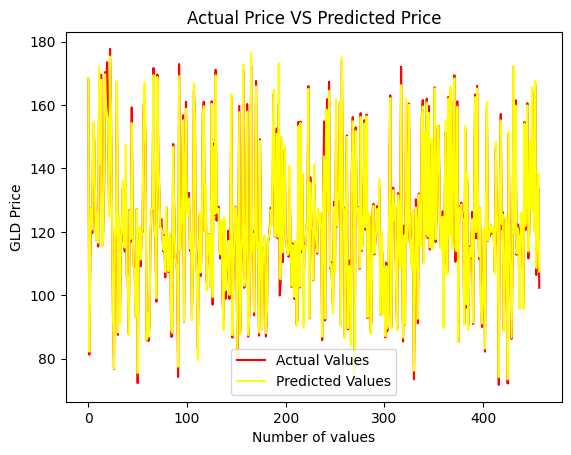

In [ ]:
plt.plot(Y_test, color='red' , label = 'Actual Values')
plt.plot(test_data_prediction, color='yellow', label='Predicted Values')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()